In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [3]:
train = pd.read_csv('./train.csv')
train

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,유동비율,당좌비율,현금비율,순운전자본비율,...,부가가치,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,폐지사유,부실여부
0,(주)DB하이텍,990,2011-12-01,1975-12-12,NaN,1,35.20,25.50,5.04,-42.95,...,217837.57,18.17,29.75,78.90,39.45,62.53,37.47,-44.96,NaN,0
1,(주)DB하이텍,990,2012-12-01,1975-12-12,NaN,1,55.66,41.39,7.19,-21.27,...,245655.23,21.22,37.03,112.22,41.58,55.93,44.07,-12.76,NaN,0
2,(주)DB하이텍,990,2013-12-01,1975-12-12,NaN,1,46.76,31.58,7.39,-23.99,...,191554.48,18.10,31.86,112.45,38.80,67.15,32.85,-43.35,NaN,0
3,(주)DB하이텍,990,2014-12-01,1975-12-12,NaN,1,65.77,47.39,10.72,-13.08,...,187341.51,19.02,33.99,136.97,33.00,68.59,31.41,-41.11,NaN,0
4,(주)DB하이텍,990,2015-12-01,1975-12-12,NaN,1,138.40,104.20,44.31,9.52,...,386127.30,39.21,78.88,230.24,57.93,35.93,64.07,32.82,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17139,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,5,411.65,341.54,40.08,14.15,...,6993.48,8.84,18.38,3684.02,4.86,48.08,51.92,31.14,NaN,0
17140,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,5,177.50,146.69,17.75,8.68,...,6826.79,8.54,18.04,4786.26,4.39,47.63,52.37,30.24,NaN,0
17141,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,5,329.17,290.09,105.67,11.59,...,7373.52,9.80,19.56,3064.10,4.44,47.47,52.53,32.14,NaN,0
17142,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,5,485.39,422.76,49.75,21.47,...,15072.74,18.02,42.99,3489.21,10.00,22.19,77.81,55.02,NaN,0


In [4]:
test = pd.read_csv('./test.csv')
test

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,유동비율,당좌비율,현금비율,순운전자본비율,...,부가가치,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,폐지사유,부실여부
0,(주)DB하이텍,990,2021-12-01,1975-12-12,NaN,1,243.09,223.40,54.58,30.96,...,744906.75,48.06,134.52,284.72,61.33,24.03,75.97,42.54,NaN,0
1,(주)DB하이텍,990,2022-12-01,1975-12-12,NaN,1,328.36,310.11,37.42,43.50,...,1068759.34,50.35,189.56,385.52,63.80,20.01,79.99,52.29,NaN,0
2,(주)HJ중공업,97230,2021-12-01,2007-08-31,NaN,1,99.90,84.41,12.45,-0.04,...,109086.00,4.57,11.81,486.17,6.39,148.44,-48.44,-128.20,NaN,0
3,(주)HJ중공업,97230,2022-12-01,2007-08-31,NaN,1,100.85,86.70,7.21,0.47,...,236842.00,9.22,36.74,923.14,13.24,75.23,24.77,-21.18,NaN,0
4,(주)MH에탄올,23150,2021-12-01,1996-12-24,NaN,1,17.51,14.42,8.94,-54.33,...,56485.88,12.51,14.71,1940.33,55.34,26.28,73.72,15.38,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,휴마시스(주),205470,2022-12-01,2014-12-01,NaN,5,315.59,279.62,16.60,54.47,...,260543.27,55.73,546.88,1235.45,55.29,8.72,91.28,70.09,NaN,0
4177,휴젤(주),145020,2021-12-01,2015-12-24,NaN,5,1139.89,1089.27,544.21,55.66,...,147369.89,14.59,200.34,610.54,60.11,30.66,69.34,40.98,NaN,0
4178,휴젤(주),145020,2022-12-01,2015-12-24,NaN,5,348.46,333.28,74.32,41.97,...,132036.05,12.58,186.53,576.99,46.88,40.43,59.57,45.96,NaN,0
4179,흥구석유(주),24060,2021-12-01,1994-12-07,NaN,5,913.64,818.58,31.93,28.57,...,5796.91,7.01,19.15,1308.44,4.38,53.22,46.78,24.13,NaN,0


### feature, target split

In [5]:
# feature & target split

X = train.drop(['부실여부', '회사명', '회계년도', '상장일', '상장폐지일', '소속코드', '폐지사유'], axis=1)
y = train['부실여부']

X_test = test.drop(['부실여부', '회사명', '회계년도', '상장일', '상장폐지일', '소속코드', '폐지사유'], axis=1)
y_test = test['부실여부']

### Ridge

In [6]:
train['부실여부'].value_counts()

부실여부
0    16962
1      182
Name: count, dtype: int64

In [7]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

# 릿지 회귀 모델 생성
ridge = Ridge(alpha=0.1)

# 피처 선택 모델 생성
selector = SelectFromModel(ridge)

# 피처 선택 수행
X_selected = selector.fit_transform(X, y)

# 선택된 피처들의 인덱스 추출
selected_feature_indices = selector.get_support(indices=True)

# 선택된 피처들의 이름 출력
selected_features = X.columns[selected_feature_indices]
print(selected_features)

Index(['총자본회전률', '자기자본회전률', '1회전기간', '순운전자본회전률', '유동자산회전률', '당좌자산회전률'], dtype='object')


In [8]:
len(selected_features)

6

### Lasso : alpha 0.01

In [9]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


# 라쏘 회귀 모델 생성 (알파값을 변경해보기)
lasso = Lasso(alpha=0.01)

# 피처 선택 모델 생성
selector = SelectFromModel(lasso)

# 피처 선택 수행
X_selected = selector.fit_transform(X, y)

# 선택된 피처들의 인덱스 추출
selected_feature_indices = selector.get_support(indices=True)

# 선택된 피처들의 이름 출력
selected_features = X.columns[selected_feature_indices]
print(selected_features)

Index(['유동비율', '순운전자본비율', '부채비율', '비유동비율', '유동자산구성비율', '총자본증가율', '자기자본증가율',
       '순이익증가율', '유형자산증가율', '비유동자산증가율', '재고자산증가율', '매출액총이익률', '매출액순이익률',
       '총자본순이익률', '자기자본순이익률', '매출채권회전률', '매입채무회전기간', '매출채권회전기간', '유형자산회전율',
       '총자본투자효율', '노동소득분배율', '이윤분배율'],
      dtype='object')


In [10]:
len(selected_features)

22

### Lasso : alpha  0.1

In [11]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


# 라쏘 회귀 모델 생성 (알파값을 변경해보기)
lasso = Lasso(alpha=0.1)

# 피처 선택 모델 생성
selector = SelectFromModel(lasso)

# 피처 선택 수행
X_selected = selector.fit_transform(X, y)

# 선택된 피처들의 인덱스 추출
selected_feature_indices = selector.get_support(indices=True)

# 선택된 피처들의 이름 출력
selected_features = X.columns[selected_feature_indices]
print(selected_features)


Index(['순운전자본비율', '부채비율', '총자본증가율', '재고자산증가율', '매출액순이익률', '자기자본순이익률',
       '매입채무회전기간', '부가가치율'],
      dtype='object')


In [12]:
len(selected_features)

8

### Lasso : alpha 1

In [13]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


# 라쏘 회귀 모델 생성 (알파값을 변경해보기)
lasso = Lasso()

# 피처 선택 모델 생성
selector = SelectFromModel(lasso)

# 피처 선택 수행
X_selected = selector.fit_transform(X, y)

# 선택된 피처들의 인덱스 추출
selected_feature_indices = selector.get_support(indices=True)

# 선택된 피처들의 이름 출력
selected_features = X.columns[selected_feature_indices]
print(selected_features)

Index(['부채비율'], dtype='object')


In [14]:
len(selected_features)

1

### SelectKBest

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest를 사용하여 피처 선택 (k=2로 설정)
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X, y)
# 선택된 피처 확인
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['자기자본구성비율', '매출액순이익률', '총자본사업이익률', '총자본순이익률', '자기자본순이익률',
       '금융비용 대 총비용비율', '총자본투자효율', '부가가치율'],
      dtype='object')


['유동비율', '순운전자본비율', '부채비율', '비유동비율', '유동자산구성비율', '매출액증가율', '총자본증가율',
       '자기자본증가율', '순이익증가율', '비유동자산증가율', '유동자산증가율', '재고자산증가율', '매출액총이익률',
       '매출액순이익률', '총자본순이익률', '자기자본순이익률', '매출채권회전률', '매입채무회전기간', '매출채권회전기간',
       '유형자산회전율', '총자본투자효율', '부가가치율', '노동소득분배율', '자본분배율', '이윤분배율']

In [16]:
list1 = ['순운전자본비율', '부채비율', '총자본증가율', '재고자산증가율', '매출액순이익률', '자기자본순이익률',
       '매입채무회전기간', '부가가치율']

list2 = ['자기자본구성비율', '매출액순이익률', '총자본사업이익률', '총자본순이익률', '자기자본순이익률',
       '금융비용 대 총비용비율', '총자본투자효율', '부가가치율']

list4 = list1 + list2
list4= pd.DataFrame(list4)
list4.value_counts()

매출액순이익률         2
부가가치율           2
자기자본순이익률        2
금융비용 대 총비용비율    1
매입채무회전기간        1
부채비율            1
순운전자본비율         1
자기자본구성비율        1
재고자산증가율         1
총자본사업이익률        1
총자본순이익률         1
총자본증가율          1
총자본투자효율         1
Name: count, dtype: int64

최종 Lasso(0.1), SelectKBest를 통해 추출한 피쳐만 사용
- ['매출액순이익률', '부가가치율', '자기자본순이익률', '금융비용 대 총비용비율', '매입채무회전기간', '부채비율', '순운전자본비율', '자기자본구성비율', '재고자산증가율', '총자본사업이익률', '총자본순이익률', '총자본증가율', '총자본투자효율']

In [17]:
# 필요한 열들을 리스트로 저장
selected_columns = ['매출액순이익률', '부가가치율', '자기자본순이익률', '금융비용 대 총비용비율', '매입채무회전기간', '부채비율', '순운전자본비율', '자기자본구성비율', '재고자산증가율', '총자본사업이익률', '총자본순이익률', '총자본증가율', '총자본투자효율', '부실여부']
# 최종피쳐 데이터프레임
train = train[selected_columns]
test = test[selected_columns]

In [18]:
len(train.columns)

14

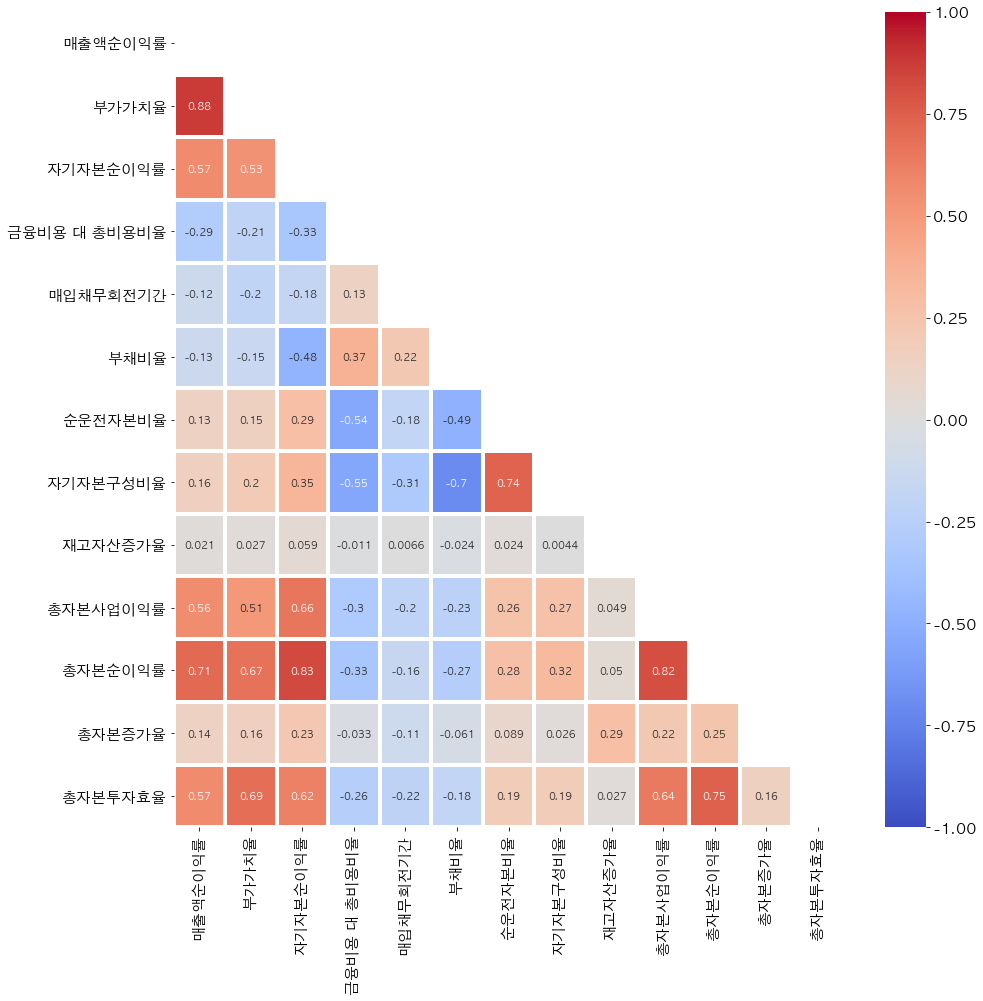

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_cor(df):
    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize=(15, 15))
    plt.rc('font', family='AppleGothic')

    # 삼각형 형태의 히트맵 출력을 위한 마스크 생성
    mask = np.triu(np.ones_like(df_cor, dtype=bool))

    sns.heatmap(df_cor,
                xticklabels=df_cor.columns,
                yticklabels=df_cor.columns,
                cmap='coolwarm',
                annot=True,
                annot_kws={'size': 10},
                linewidth=3,
                vmin=-1, vmax=1,
                mask=mask)  # 마스크 적용

    plt.show()

# 함수 호출하여 피어슨 상관 분포 히트맵 그리기
# 예를 들어, 데이터프레임 df가 있다면 아래와 같이 함수를 호출
plot_cor(train.drop(columns='부실여부'))

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train.drop(columns=['부실여부'])  # 독립변수만 선택

# VIF 계산을 위해 상수항 추가
X_with_const = sm.add_constant(X)

# 각 독립변수에 대한 VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 결과 출력
print(vif_data)

         feature        VIF
0          const  46.931713
1        매출액순이익률   6.678317
2          부가가치율   6.952976
3       자기자본순이익률   4.603020
4   금융비용 대 총비용비율   1.767298
5       매입채무회전기간   1.205316
6           부채비율   2.708298
7        순운전자본비율   2.419986
8       자기자본구성비율   4.302684
9        재고자산증가율   1.092136
10      총자본사업이익률   3.182255
11       총자본순이익률   9.122536
12        총자본증가율   1.208498
13       총자본투자효율   3.497053


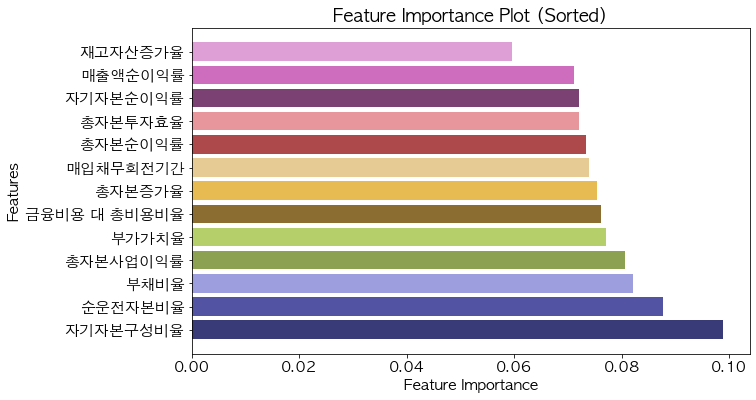

In [21]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 랜덤 포레스트 분류기 객체 생성
model = RandomForestClassifier(random_state=42)

# 모델 학습
model.fit(X, y)

# 피처 임포턴스 얻기
feature_importances = model.feature_importances_

# 결과 출력 및 정렬
# print("피처 임포턴스 (내림차순):")
sorted_indices = np.argsort(feature_importances)[::-1]
# for i, idx in enumerate(sorted_indices):
#     print(f"{X.columns[idx]}: {feature_importances[idx]}")

# 그래프에 사용할 색상 리스트
colors = plt.cm.tab20b(np.linspace(0, 1, len(X.columns)))

# 피처 임포턴스 그래프 그리기 (정렬된 순서와 색상 적용)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_indices], feature_importances[sorted_indices], color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (Sorted)')
plt.show()


In [22]:
train = train.drop(columns='부가가치율')

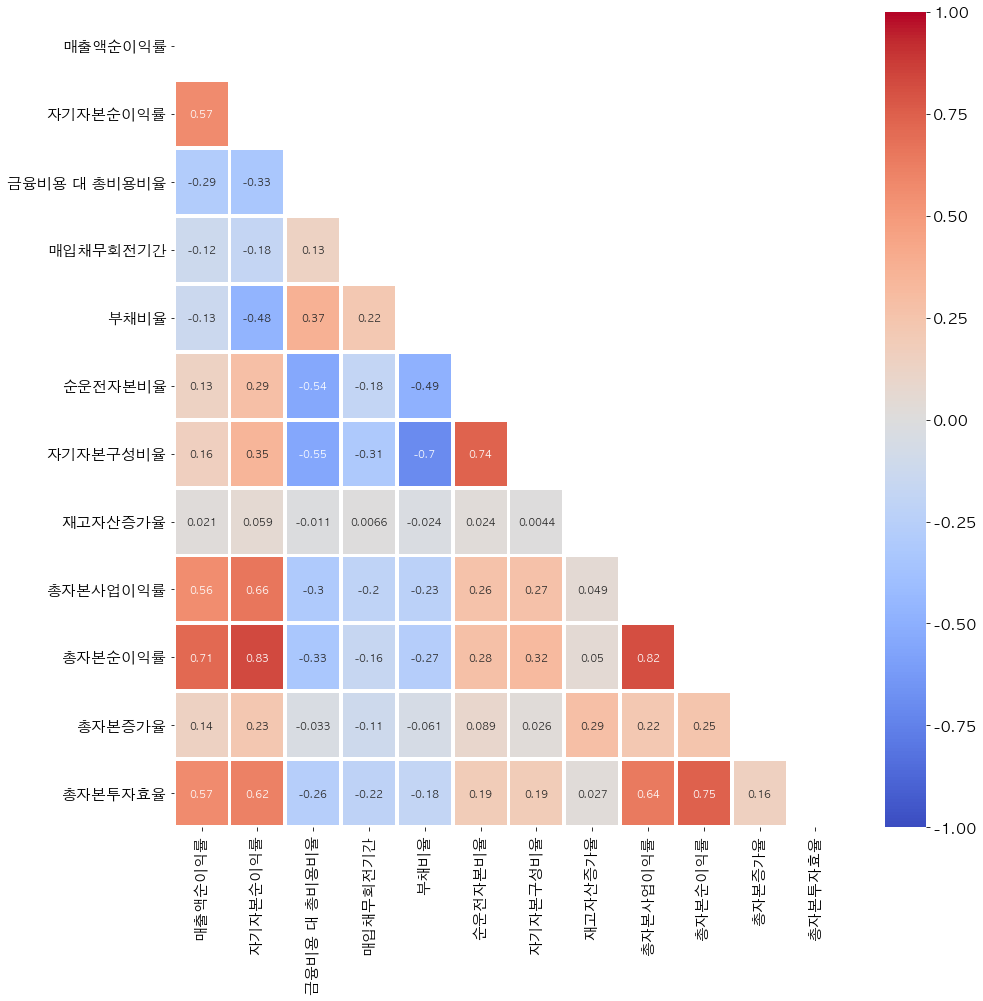

In [23]:
plot_cor(train.drop(columns='부실여부'))

In [24]:
train = train.drop(columns='총자본순이익률')

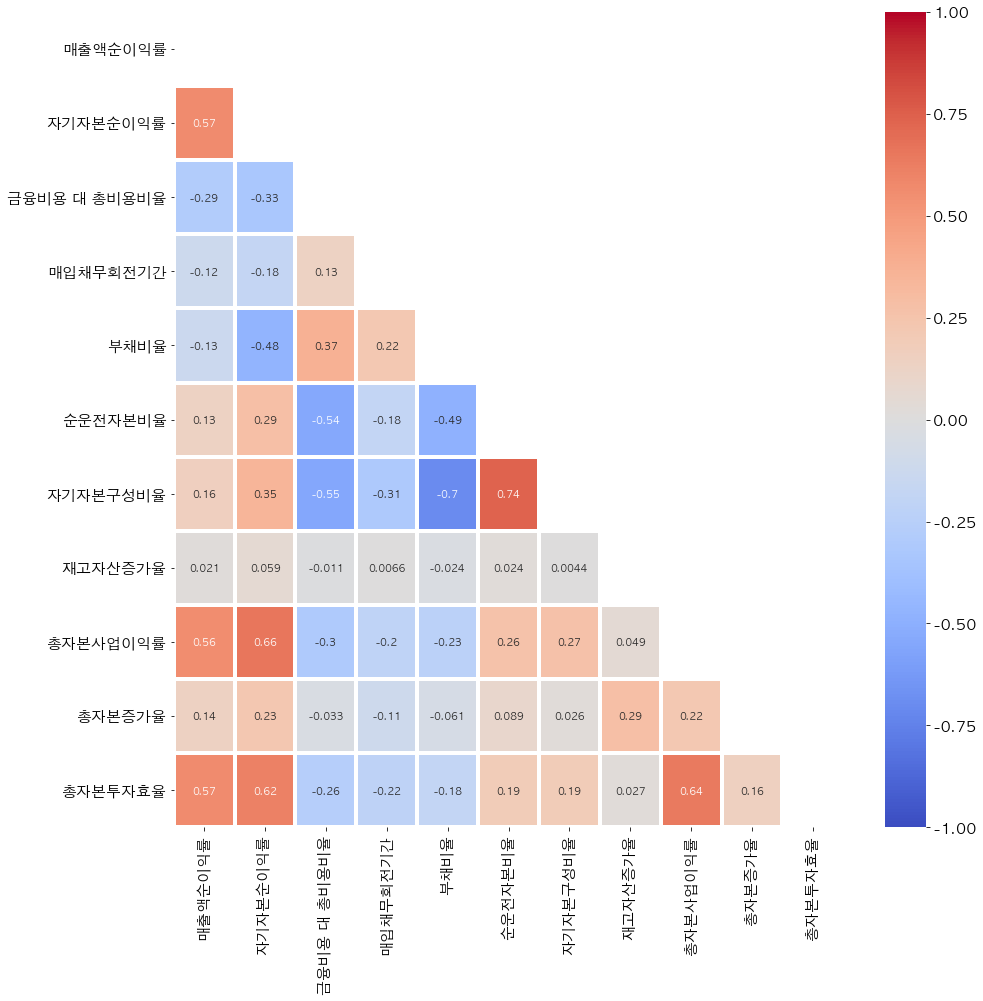

In [25]:
plot_cor(train.drop(columns='부실여부'))

In [26]:
train = train.drop(columns='자기자본구성비율')

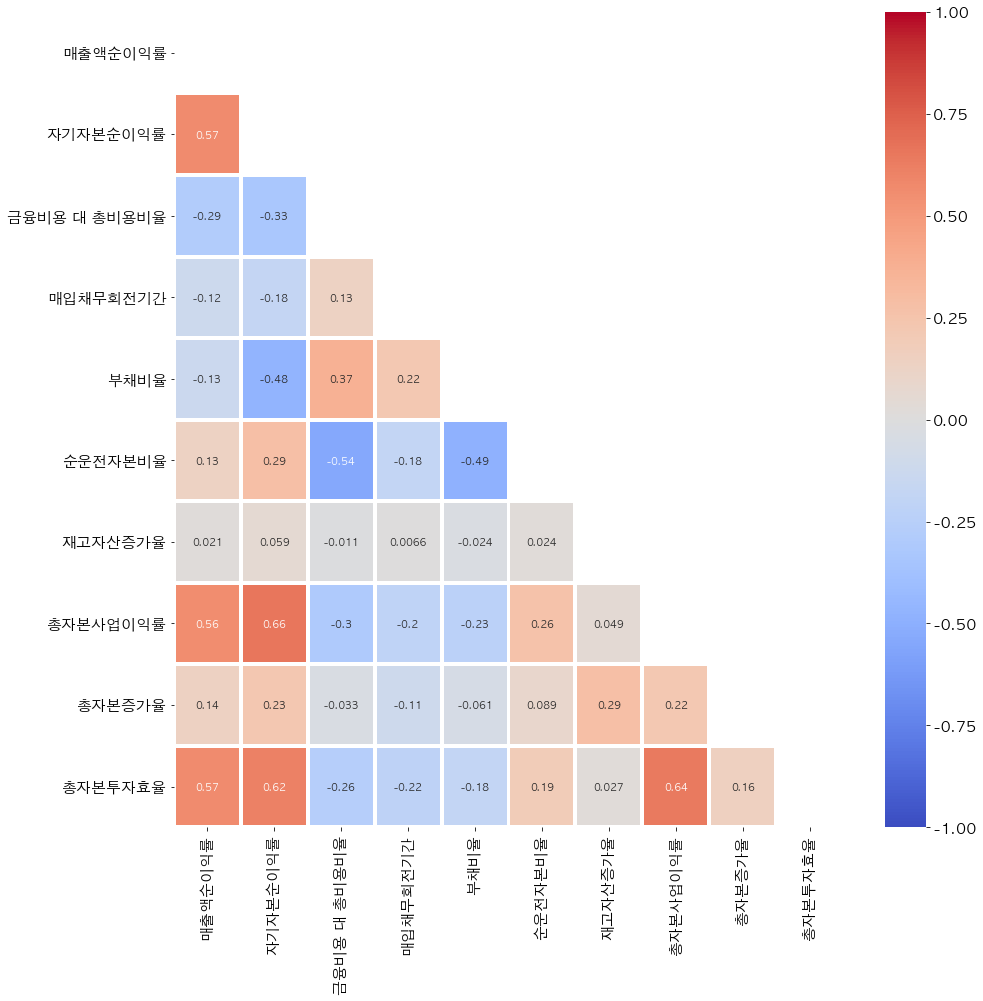

In [27]:
plot_cor(train.drop(columns='부실여부'))

In [28]:
train.columns

Index(['매출액순이익률', '자기자본순이익률', '금융비용 대 총비용비율', '매입채무회전기간', '부채비율', '순운전자본비율',
       '재고자산증가율', '총자본사업이익률', '총자본증가율', '총자본투자효율', '부실여부'],
      dtype='object')

In [29]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = train.drop(columns=['부실여부'])  # 독립변수만 선택

# VIF 계산을 위해 상수항 추가
X_with_const = sm.add_constant(X)

# 각 독립변수에 대한 VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 결과를 데이터프레임으로 출력
print("VIF 계수 표:")
vif_data

VIF 계수 표:


,feature,VIF
0,const,7.385972
1,매출액순이익률,1.810910
2,자기자본순이익률,2.798151
3,금융비용 대 총비용비율,1.557598
4,매입채무회전기간,1.109790
5,부채비율,1.747153
6,순운전자본비율,1.685093
7,재고자산증가율,1.091571
8,총자본사업이익률,2.280833
9,총자본증가율,1.174361


In [30]:
len(train.columns)

11

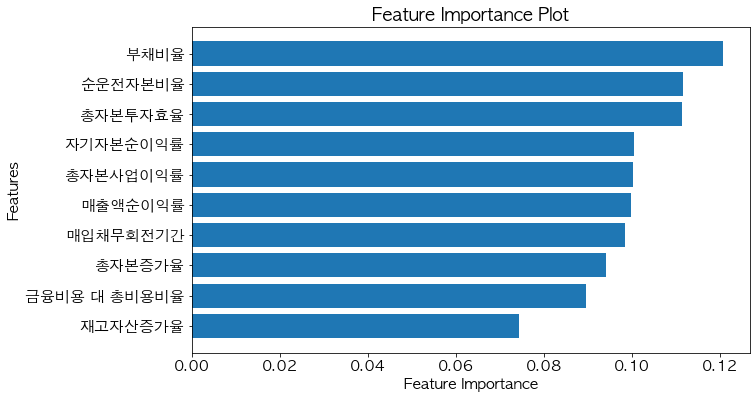

In [36]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 랜덤 포레스트 분류기 객체 생성
model = RandomForestClassifier(random_state=42)

X = train.drop(columns=['부실여부'])
y = train['부실여부']
# 모델 학습
model.fit(X, y)

# 피처 임포턴스 얻기
feature_importances = model.feature_importances_

# 결과 출력 및 정렬
sorted_indices = np.argsort(feature_importances)

# 피처 임포턴스 그래프 그리기 (정렬된 순서와 기본 색상 팔레트 자동 적용)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_indices], feature_importances[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()



- 최종피처 ['매출액순이익률', '자기자본순이익률', '금융비용 대 총비용비율', '매입채무회전기간', '부채비율', '순운전자본비율',
       '재고자산증가율', '총자본사업이익률', '총자본증가율', '총자본투자효율']

In [32]:
# 정렬된 피처의 인덱스 배열
sorted_indices = np.argsort(feature_importances)[::-1]

# 피처 이름과 중요도 출력
for i, idx in enumerate(sorted_indices):
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

부채비율: 0.12066392857776158
순운전자본비율: 0.11145715596178832
총자본투자효율: 0.11136480427970127
자기자본순이익률: 0.10034293760737954
총자본사업이익률: 0.10020290931155029
매출액순이익률: 0.09984868648959308
매입채무회전기간: 0.09832723706151235
총자본증가율: 0.09397158019464905
금융비용 대 총비용비율: 0.08959134084808998
재고자산증가율: 0.07422941966797451
